## Indigenous Fire Stewardship Opportunity Map
## Reconnecting Cultural Fire with Landscape Management

**Purpose:** This analysis identifies opportunities to restore Indigenous fire stewardship practices that can:
- Reduce catastrophic wildfire risk
- Restore cultural and ecological relationships
- Enhance biodiversity and ecosystem health
- Strengthen community safety and resilience
- Support Tribal sovereignty and traditional knowledge

**Traditional Knowledge & Cultural Sensitivity**

This analysis:
- Recognizes Indigenous peoples as the original fire stewards
- Respects Tribal sovereignty over traditional practices
- Never presumes to define "correct" cultural burning
- Supports Tribal-led fire management decisions
- Acknowledges that Western science is ONE knowledge system
- Centers Indigenous knowledge and self-determination

**Questions:**
1. Where could cultural fire reduce fast-fire risk?
2. What landscapes are ecologically suitable for cultural burning?
3. Where are trained practitioners available?
4. What co-benefits would cultural fire provide?
5. How can Western science interact with Indigenous knowledge?

**Outputs:**
- Cultural fire opportunity maps
- Ecological suitability analysis
- Co-benefits quantification (biodiversity, carbon, safety)
- Barriers and enablers assessment

## 1. Setup and Dependencies

In [ ]:
# Install required packages (uncomment if needed)
# !pip install geopandas pandas numpy matplotlib seaborn rasterio rioxarray shapely networkx scipy

In [27]:
# Imports
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
from shapely.geometry import Point, LineString, Polygon, box, MultiPolygon
from shapely.ops import unary_union, nearest_points
import rasterio
from rasterio.features import rasterize
from scipy.ndimage import distance_transform_edt
from scipy.spatial import distance
import warnings
from datetime import datetime
from pathlib import Path
import json

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully")
print(f"Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print("\nHonoring Indigenous fire stewardship and traditional knowledge")

Libraries loaded successfully
Analysis date: 2026-02-16 15:45

Honoring Indigenous fire stewardship and traditional knowledge


## Framework: Indigenous Fire Stewardship Principles

### Define Analysis Framework

In [4]:
# Indigenous Fire Stewardship Framework
STEWARDSHIP_PRINCIPLES = {
    'sovereignty': {
        'description': 'Tribal sovereignty over fire management decisions',
        'implementation': 'Tribal-led planning and execution',
        'priority': 1
    },
    'traditional_knowledge': {
        'description': 'Indigenous knowledge systems guide practices',
        'implementation': 'Elder consultation and cultural protocols',
        'priority': 1
    },
    'ecological_restoration': {
        'description': 'Restore fire-adapted ecosystems',
        'implementation': 'Fire return interval restoration',
        'priority': 2
    },
    'cultural_continuity': {
        'description': 'Maintain cultural practices and relationships',
        'implementation': 'Intergenerational knowledge transfer',
        'priority': 1
    },
    'community_safety': {
        'description': 'Protect communities from catastrophic fire',
        'implementation': 'Strategic fuel reduction',
        'priority': 2
    }
}

# Analysis configuration
ANALYSIS_CONFIG = {
    'historical_fire_return_interval': {
        'frequent': (0, 15),      # Years - grasslands, oak woodlands
        'moderate': (15, 35),     # Years - pine forests
        'infrequent': (35, 100)   # Years - mixed conifer
    },
    'suitable_vegetation_types': [
        'Grassland',
        'Oak Woodland',
        'Pine Forest',
        'Mixed Conifer',
        'Shrubland',
        'Riparian'
    ],
    'practitioner_distance_km': 50,  # Max distance to trained crews
    'burn_window_months': [3, 4, 5, 10, 11],  # Spring and fall
}

print("INDIGENOUS FIRE STEWARDSHIP FRAMEWORK")
print("="*80)
print("\nPrinciples:")
for principle, config in STEWARDSHIP_PRINCIPLES.items():
    print(f"\n{principle.replace('_', ' ').title()}:")
    print(f"  {config['description']}")
    print(f"  Implementation: {config['implementation']}")
    print(f"  Priority: {config['priority']}") 

print("\n" + "="*80)
print("This framework centers Indigenous sovereignty and knowledge.")
print("Western science serves to support, not replace, traditional practices.")
print("="*80)

INDIGENOUS FIRE STEWARDSHIP FRAMEWORK

Principles:

Sovereignty:
  Tribal sovereignty over fire management decisions
  Implementation: Tribal-led planning and execution
  Priority: 1

Traditional Knowledge:
  Indigenous knowledge systems guide practices
  Implementation: Elder consultation and cultural protocols
  Priority: 1

Ecological Restoration:
  Restore fire-adapted ecosystems
  Implementation: Fire return interval restoration
  Priority: 2

Cultural Continuity:
  Maintain cultural practices and relationships
  Implementation: Intergenerational knowledge transfer
  Priority: 1

Community Safety:
  Protect communities from catastrophic fire
  Implementation: Strategic fuel reduction
  Priority: 2

This framework centers Indigenous sovereignty and knowledge.
Western science serves to support, not replace, traditional practices.


## Load Data

### Load Tribal Lands

In [6]:
# Load tribal boundaries
# Real source: BIA AIAN Lands https://biamaps.doi.gov/

# Example usage: Create sample tribal land
sample_reservation = {
    'reservation_name': 'Karuk Ancestral Territory',
    'tribe': 'Karuk Tribe',
    'state': 'CA',
    'acres': 1200000,
    'fire_tradition': 'Active fire stewardship for millennia',
    'current_fire_program': 'Yes: Cultural burning program established'
}

# Create boundary
center_lon, center_lat = -123.5, 41.5
tribal_lands = gpd.GeoDataFrame(
    [sample_reservation],
    geometry=[Point(center_lon, center_lat).buffer(0.5)],
    crs='EPSG:4326'
)

# Add buffer for analysis area (traditional territory often larger)
analysis_boundary = tribal_lands.copy()
analysis_boundary = analysis_boundary.to_crs('EPSG:5070')
analysis_boundary['geometry'] = analysis_boundary.buffer(10000)  # 10km buffer
analysis_boundary = analysis_boundary.to_crs('EPSG:4326')

print(f"Loaded: {sample_reservation['tribe']}")
print(f"Fire Tradition: {sample_reservation['fire_tradition']}")
print(f"Current Program: {sample_reservation['current_fire_program']}")

Loaded: Karuk Tribe
Fire Tradition: Active fire stewardship for millennia
Current Program: Yes: Cultural burning program established


### Load/Generate Historical Fire Use Areas

**Data Sources (with Tribal Consent):**
- Tribal oral histories and traditional knowledge
- Ethnohistorical records
- Fire scar studies
- Dendrochronology
- Archaeological evidence

In [8]:
def generate_historical_fire_areas(boundary, tribal_knowledge_informed=True):
    """
    Identify areas with historical cultural fire use.
    
    In practice:
    - Consult Tribal elders and cultural practitioners
    - Review ethnohistorical records with Tribal historians
    - Use fire scar data (with interpretation)
    - NEVER presume to define traditional use areas: consult first
    """
    if not tribal_knowledge_informed:
        print("Analysis must be informed by Tribal knowledge")
        print("Consult with appropriate Tribal departments.")
        return gpd.GeoDataFrame()
    
    bounds = boundary.total_bounds
    
    # Example usage: Create generalized historical use areas
    
    use_areas = [
        {
            'use_type': 'Oak Woodland Tending',
            'traditional_purpose': 'Acorn production, basket materials',
            'fire_frequency': 'Annual to biennial',
            'season': 'Fall',
            'knowledge_source': 'Tribal Elder interviews',
            'confidence': 'High',
            'geometry': box(bounds[0] + 0.1, bounds[1] + 0.1, 
                          bounds[0] + 0.3, bounds[1] + 0.3)
        },
        {
            'use_type': 'Meadow Management',
            'traditional_purpose': 'Deer forage, basket sedge',
            'fire_frequency': 'Every 1-3 years',
            'season': 'Spring',
            'knowledge_source': 'Historical accounts, current practice',
            'confidence': 'High',
            'geometry': box(bounds[2] - 0.3, bounds[1] + 0.2,
                          bounds[2] - 0.1, bounds[1] + 0.4)
        },
        {
            'use_type': 'Forest Understory',
            'traditional_purpose': 'Hazard reduction, hunting access',
            'fire_frequency': 'Every 5-10 years',
            'season': 'Fall',
            'knowledge_source': 'Fire scar studies',
            'confidence': 'Moderate',
            'geometry': box(bounds[0] + 0.2, bounds[3] - 0.3,
                          bounds[0] + 0.4, bounds[3] - 0.1)
        },
        {
            'use_type': 'Hazelnut Patches',
            'traditional_purpose': 'Stimulate hazelnut production',
            'fire_frequency': 'Every 3-5 years',
            'season': 'Fall',
            'knowledge_source': 'Active traditional practice',
            'confidence': 'High',
            'geometry': box(bounds[2] - 0.25, bounds[3] - 0.3,
                          bounds[2] - 0.1, bounds[3] - 0.15)
        }
    ]
    
    return gpd.GeoDataFrame(use_areas, crs='EPSG:4326')

# Load historical fire areas
historical_fire_areas = generate_historical_fire_areas(
    analysis_boundary,
    tribal_knowledge_informed=True
)

print("\nHISTORICAL CULTURAL FIRE USE AREAS")
print("="*80)
print(f"Areas identified: {len(historical_fire_areas)}")
print("\nKnowledge sources:")
print(historical_fire_areas['knowledge_source'].value_counts())
print("\nTraditional uses:")
display(historical_fire_areas[['use_type', 'traditional_purpose', 'fire_frequency', 'confidence']])


HISTORICAL CULTURAL FIRE USE AREAS
Areas identified: 4

Knowledge sources:
knowledge_source
Tribal Elder interviews                  1
Historical accounts, current practice    1
Fire scar studies                        1
Active traditional practice              1
Name: count, dtype: int64

Traditional uses:


,use_type,traditional_purpose,fire_frequency,confidence
0,Oak Woodland Tending,"Acorn production, basket materials",Annual to biennial,High
1,Meadow Management,"Deer forage, basket sedge",Every 1-3 years,High
2,Forest Understory,"Hazard reduction, hunting access",Every 5-10 years,Moderate
3,Hazelnut Patches,Stimulate hazelnut production,Every 3-5 years,High


### Load Vegetation and Ecosystem Data

In [9]:
def generate_vegetation_types(boundary):
    """
    Generate vegetation types.
    
    Real data sources:
    - LANDFIRE Existing Vegetation Type (EVT)
    - State vegetation maps
    - Tribal ecological assessments
    """
    bounds = boundary.total_bounds
    
    # Create grid
    grid_size = 0.05
    x_coords = np.arange(bounds[0], bounds[2], grid_size)
    y_coords = np.arange(bounds[1], bounds[3], grid_size)
    
    veg_types = []
    
    veg_options = [
        ('Grassland', 5, 'High', 'Annual'),
        ('Oak Woodland', 8, 'High', '1-2 years'),
        ('Pine Forest', 15, 'High', '5-15 years'),
        ('Mixed Conifer', 30, 'Moderate', '15-30 years'),
        ('Shrubland', 10, 'High', '3-10 years'),
        ('Riparian', 5, 'Moderate', 'Variable')
    ]
    
    for x in x_coords:
        for y in y_coords:
            cell = box(x, y, x + grid_size, y + grid_size)
            
            # Check if within boundary
            if boundary.geometry.iloc[0].intersects(cell):
                # Random vegetation type
                veg_type, hfri, suitability, interval = veg_options[
                    np.random.randint(0, len(veg_options))
                ]
                
                # Add variation
                hfri_actual = int(hfri * np.random.uniform(0.8, 1.2))
                
                veg_types.append({
                    'vegetation_type': veg_type,
                    'historical_fire_return_interval_years': hfri_actual,
                    'cultural_burn_suitability': suitability,
                    'recommended_interval': interval,
                    'fire_adapted': True,
                    'geometry': cell
                })
    
    return gpd.GeoDataFrame(veg_types, crs='EPSG:4326')

# Generate vegetation data
vegetation = generate_vegetation_types(analysis_boundary)

print("\nVEGETATION & ECOSYSTEM DATA")
print("="*80)
print(f"Total cells: {len(vegetation)}")
print("\nVegetation types:")
print(vegetation['vegetation_type'].value_counts())
print("\nCultural burn suitability:")
print(vegetation['cultural_burn_suitability'].value_counts())


VEGETATION & ECOSYSTEM DATA
Total cells: 503

Vegetation types:
vegetation_type
Pine Forest      98
Mixed Conifer    91
Shrubland        84
Oak Woodland     83
Grassland        75
Riparian         72
Name: count, dtype: int64

Cultural burn suitability:
cultural_burn_suitability
High        340
Moderate    163
Name: count, dtype: int64


### Load Fire Risk Data

In [10]:
def generate_fire_risk(boundary, vegetation_gdf):
    """
    Generate fire risk based on fuel conditions and fire history.
    """
    risk_data = vegetation_gdf.copy()
    
    # Calculate risk based on:
    # 1. Time since last fire (assumed to be long without cultural burning)
    # 2. Historical fire frequency (shorter = more fuel accumulation when suppressed)
    
    risk_data['years_since_fire'] = np.random.randint(50, 150, len(risk_data))
    
    # Risk score (0-10)
    risk_data['fire_risk_score'] = (
        np.minimum(risk_data['years_since_fire'] / 
                  risk_data['historical_fire_return_interval_years'], 5) * 2
    ).clip(0, 10)
    
    # Categorize
    risk_data['risk_category'] = pd.cut(
        risk_data['fire_risk_score'],
        bins=[0, 4, 7, 10],
        labels=['Low', 'Moderate', 'High']
    )
    
    return risk_data

# Generate fire risk
fire_risk = generate_fire_risk(analysis_boundary, vegetation)

print("\nFIRE RISK ANALYSIS")
print("="*80)
print("Risk distribution:")
print(fire_risk['risk_category'].value_counts())
print(f"\nMean risk score: {fire_risk['fire_risk_score'].mean():.2f}")
print(f"Mean years since fire: {fire_risk['years_since_fire'].mean():.1f}")


FIRE RISK ANALYSIS
Risk distribution:
risk_category
High        449
Moderate     41
Low          13
Name: count, dtype: int64

Mean risk score: 9.36
Mean years since fire: 100.3


### Load/Generate Fire Practitioner Data

In [11]:
def generate_fire_practitioners(boundary):
    """
    Map locations of trained cultural fire practitioners.
    
    Sources:
    - Tribal fire departments
    - Indigenous Peoples Burning Network (IPBN)
    - Tribal fire training programs
    - Cultural burning associations
    """
    bounds = boundary.total_bounds
    
    practitioners = [
        {
            'name': 'Tribal Fire Management',
            'type': 'Tribal Crew',
            'crew_size': 8,
            'trained_in_cultural_burning': True,
            'traditional_knowledge': True,
            'burn_boss_qualified': 3,
            'geometry': Point(bounds[0] + 0.2, bounds[1] + 0.2)
        },
        {
            'name': 'Cultural Burning Association',
            'type': 'Community Group',
            'crew_size': 12,
            'trained_in_cultural_burning': True,
            'traditional_knowledge': True,
            'burn_boss_qualified': 2,
            'geometry': Point(bounds[2] - 0.25, bounds[3] - 0.25)
        },
        {
            'name': 'USFS Partnership Crew',
            'type': 'Federal Partner',
            'crew_size': 6,
            'trained_in_cultural_burning': False,
            'traditional_knowledge': False,
            'burn_boss_qualified': 2,
            'geometry': Point(bounds[0] + 0.4, bounds[1] + 0.4)
        },
        {
            'name': 'Indigenous Youth Training Program',
            'type': 'Training Program',
            'crew_size': 15,
            'trained_in_cultural_burning': True,
            'traditional_knowledge': True,
            'burn_boss_qualified': 1,
            'geometry': Point(bounds[0] + 0.3, bounds[3] - 0.3)
        }
    ]
    
    return gpd.GeoDataFrame(practitioners, crs='EPSG:4326')

# Generate practitioner data
practitioners = generate_fire_practitioners(analysis_boundary)

print("\nFIRE PRACTITIONERS & CREWS")
print("="*80)
print(f"Total crews/programs: {len(practitioners)}")
print(f"Total crew members: {practitioners['crew_size'].sum()}")
print(f"Burn boss qualified: {practitioners['burn_boss_qualified'].sum()}")
print(f"\nCultural burning trained: {practitioners['trained_in_cultural_burning'].sum()}")
print(f"Traditional knowledge holders: {practitioners['traditional_knowledge'].sum()}")

display(practitioners[['name', 'type', 'crew_size', 'trained_in_cultural_burning']])


FIRE PRACTITIONERS & CREWS
Total crews/programs: 4
Total crew members: 41
Burn boss qualified: 8

Cultural burning trained: 3
Traditional knowledge holders: 3


,name,type,crew_size,trained_in_cultural_burning
0,Tribal Fire Management,Tribal Crew,8,True
1,Cultural Burning Association,Community Group,12,True
2,USFS Partnership Crew,Federal Partner,6,False
3,Indigenous Youth Training Program,Training Program,15,True


## Opportunity Analysis

### Calculate Ecological Suitability

In [12]:
def calculate_ecological_suitability(vegetation_gdf, fire_risk_gdf):
    """
    Calculate suitability for cultural burning based on:
    - Vegetation type (fire-adapted ecosystems)
    - Historical fire return interval
    - Current fire risk
    - Fuel conditions
    """
    suitability = vegetation_gdf.copy()
    
    # Base suitability from vegetation type
    suitability_scores = {
        'Grassland': 9,
        'Oak Woodland': 10,
        'Pine Forest': 8,
        'Mixed Conifer': 6,
        'Shrubland': 8,
        'Riparian': 5
    }
    
    suitability['base_suitability'] = suitability['vegetation_type'].map(
        suitability_scores
    )
    
    # Adjust for fire return interval deviation
    # Higher score if current interval much longer than historical
    suitability = suitability.merge(
        fire_risk_gdf[['geometry', 'years_since_fire', 'fire_risk_score']],
        on='geometry'
    )
    
    suitability['interval_deviation'] = (
        suitability['years_since_fire'] / 
        suitability['historical_fire_return_interval_years']
    )
    
    # Adjust for areas with severe fire deficit
    suitability['deficit_bonus'] = np.where(
        suitability['interval_deviation'] > 3,
        2,
        np.where(suitability['interval_deviation'] > 2, 1, 0)
    )
    
    # Calculate composite suitability (0-10)
    suitability['ecological_suitability'] = (
        suitability['base_suitability'] * 0.6 +
        suitability['deficit_bonus'] * 2 +
        np.minimum(suitability['fire_risk_score'] / 2, 2)
    ).clip(0, 10)
    
    # Categorize
    suitability['suitability_category'] = pd.cut(
        suitability['ecological_suitability'],
        bins=[0, 4, 7, 10],
        labels=['Low', 'Moderate', 'High']
    )
    
    return suitability

# Calculate suitability
ecological_suitability = calculate_ecological_suitability(vegetation, fire_risk)

print("\nECOLOGICAL SUITABILITY FOR CULTURAL BURNING")
print("="*80)
print("Suitability distribution:")
print(ecological_suitability['suitability_category'].value_counts())
print(f"\nMean suitability score: {ecological_suitability['ecological_suitability'].mean():.2f}")

print("\nHigh suitability by vegetation type:")
high_suit = ecological_suitability[ecological_suitability['suitability_category'] == 'High']
print(high_suit['vegetation_type'].value_counts())


ECOLOGICAL SUITABILITY FOR CULTURAL BURNING
Suitability distribution:
suitability_category
High        490
Moderate     13
Low           0
Name: count, dtype: int64

Mean suitability score: 9.58

High suitability by vegetation type:
vegetation_type
Pine Forest      98
Shrubland        84
Oak Woodland     83
Mixed Conifer    78
Grassland        75
Riparian         72
Name: count, dtype: int64


### Calculate Practitioner Accessibility

In [13]:
def calculate_practitioner_accessibility(areas_gdf, practitioners_gdf, max_distance_km=50):
    """
    Calculate accessibility to trained cultural fire practitioners.
    """
    # Convert to metric CRS
    areas_metric = areas_gdf.to_crs('EPSG:5070')
    practitioners_metric = practitioners_gdf.to_crs('EPSG:5070')
    
    # Calculate distance to nearest practitioner
    distances = []
    nearest_crew = []
    cultural_trained = []
    
    for idx, area in areas_metric.iterrows():
        # Calculate distances to all practitioners
        dists = practitioners_metric.geometry.distance(area.geometry.centroid)
        min_dist_m = dists.min()
        nearest_idx = dists.idxmin()
        
        distances.append(min_dist_m / 1000)  # Convert to km
        nearest_crew.append(practitioners_metric.loc[nearest_idx, 'name'])
        cultural_trained.append(
            practitioners_metric.loc[nearest_idx, 'trained_in_cultural_burning']
        )
    
    areas_gdf['distance_to_practitioners_km'] = distances
    areas_gdf['nearest_crew'] = nearest_crew
    areas_gdf['culturally_trained_available'] = cultural_trained
    
    # Accessibility score (0-10)
    # Closer = higher score
    areas_gdf['accessibility_score'] = (
        10 - (areas_gdf['distance_to_practitioners_km'] / max_distance_km * 10)
    ).clip(0, 10)
    
    # Bonus for culturally trained crews
    areas_gdf.loc[
        areas_gdf['culturally_trained_available'],
        'accessibility_score'
    ] += 2
    
    areas_gdf['accessibility_score'] = areas_gdf['accessibility_score'].clip(0, 10)
    
    # Categorize
    areas_gdf['accessibility_category'] = pd.cut(
        areas_gdf['accessibility_score'],
        bins=[0, 4, 7, 10],
        labels=['Low', 'Moderate', 'High']
    )
    
    return areas_gdf

# Calculate accessibility
accessibility = calculate_practitioner_accessibility(
    ecological_suitability,
    practitioners
)

print("\nPRACTITIONER ACCESSIBILITY ANALYSIS")
print("="*80)
print("Accessibility distribution:")
print(accessibility['accessibility_category'].value_counts())
print(f"\nMean distance to practitioners: {accessibility['distance_to_practitioners_km'].mean():.1f} km")
print(f"Areas with culturally trained crews available: {accessibility['culturally_trained_available'].sum()}")


PRACTITIONER ACCESSIBILITY ANALYSIS
Accessibility distribution:
accessibility_category
High        219
Moderate    161
Low          92
Name: count, dtype: int64

Mean distance to practitioners: 26.6 km
Areas with culturally trained crews available: 318


### 4.3 Calculate Composite Opportunity Score

In [14]:
def calculate_opportunity_score(accessibility_gdf, historical_areas_gdf):
    """
    Calculate composite opportunity score for cultural burning.
    
    Factors:
    - Ecological suitability (40%)
    - Fire risk reduction benefit (30%)
    - Practitioner accessibility (20%)
    - Historical cultural use (10% bonus)
    """
    opportunity = accessibility_gdf.copy()
    
    # Calculate base opportunity score
    opportunity['base_opportunity'] = (
        opportunity['ecological_suitability'] * 0.4 +
        opportunity['fire_risk_score'] * 0.3 +
        opportunity['accessibility_score'] * 0.2
    )
    
    # Add historical use bonus
    opportunity['historical_use'] = False
    
    for idx, hist_area in historical_areas_gdf.iterrows():
        # Check intersection
        intersects = opportunity.geometry.intersects(hist_area.geometry)
        opportunity.loc[intersects, 'historical_use'] = True
    
    # Apply bonus
    opportunity['opportunity_score'] = opportunity['base_opportunity'].copy()
    opportunity.loc[
        opportunity['historical_use'],
        'opportunity_score'
    ] += 1  # Bonus for historical use
    
    opportunity['opportunity_score'] = opportunity['opportunity_score'].clip(0, 10)
    
    # Categorize
    opportunity['opportunity_category'] = pd.cut(
        opportunity['opportunity_score'],
        bins=[0, 4, 7, 10],
        labels=['Low', 'Moderate', 'High']
    )
    
    return opportunity

# Calculate opportunity scores
cultural_fire_opportunity = calculate_opportunity_score(
    accessibility,
    historical_fire_areas
)

print("\nCULTURAL FIRE OPPORTUNITY ANALYSIS")
print("="*80)
print("Opportunity distribution:")
print(cultural_fire_opportunity['opportunity_category'].value_counts())
print(f"\nMean opportunity score: {cultural_fire_opportunity['opportunity_score'].mean():.2f}")
print(f"\nAreas with historical cultural use: {cultural_fire_opportunity['historical_use'].sum()}")

# High opportunity areas
high_opportunity = cultural_fire_opportunity[
    cultural_fire_opportunity['opportunity_category'] == 'High'
]

print(f"\nHigh opportunity areas: {len(high_opportunity)}")
print("Vegetation types:")
print(high_opportunity['vegetation_type'].value_counts())


CULTURAL FIRE OPPORTUNITY ANALYSIS
Opportunity distribution:
opportunity_category
High        440
Moderate     61
Low           2
Name: count, dtype: int64

Mean opportunity score: 8.02

Areas with historical cultural use: 89

High opportunity areas: 440
Vegetation types:
vegetation_type
Pine Forest      96
Shrubland        82
Oak Woodland     78
Grassland        72
Riparian         66
Mixed Conifer    46
Name: count, dtype: int64


## Co-Benefits Analysis

### Biodiversity Benefits

In [15]:
def estimate_biodiversity_benefits(opportunity_gdf):
    """
    Estimate biodiversity benefits from cultural fire restoration.
    
    Benefits include:
    - Habitat heterogeneity
    - Native species enhancement
    - Invasive species control
    - Pollinator support
    """
    biodiversity = opportunity_gdf.copy()
    
    # Biodiversity benefit scores by vegetation type
    biodiversity_scores = {
        'Grassland': 9,        # High diversity response
        'Oak Woodland': 10,    # Extremely high diversity
        'Pine Forest': 7,      # Moderate-high
        'Mixed Conifer': 6,    # Moderate
        'Shrubland': 8,        # High
        'Riparian': 7          # High but sensitive
    }
    
    biodiversity['biodiversity_benefit'] = biodiversity['vegetation_type'].map(
        biodiversity_scores
    )
    
    # Specific benefits
    biodiversity['native_plant_enhancement'] = biodiversity['vegetation_type'].isin([
        'Grassland', 'Oak Woodland', 'Shrubland'
    ])
    
    biodiversity['pollinator_benefit'] = biodiversity['vegetation_type'].isin([
        'Grassland', 'Oak Woodland', 'Riparian'
    ])
    
    biodiversity['wildlife_habitat_improvement'] = biodiversity['vegetation_type'].isin([
        'Oak Woodland', 'Pine Forest', 'Riparian'
    ])
    
    return biodiversity

# Calculate biodiversity benefits
with_biodiversity = estimate_biodiversity_benefits(cultural_fire_opportunity)

print("\nBIODIVERSITY BENEFITS")
print("="*80)
print(f"Mean biodiversity benefit score: {with_biodiversity['biodiversity_benefit'].mean():.2f}")
print(f"\nAreas with native plant enhancement: {with_biodiversity['native_plant_enhancement'].sum()}")
print(f"Areas with pollinator benefits: {with_biodiversity['pollinator_benefit'].sum()}")
print(f"Areas with wildlife habitat improvement: {with_biodiversity['wildlife_habitat_improvement'].sum()}")

# High opportunity + high biodiversity
high_bio_opportunity = with_biodiversity[
    (with_biodiversity['opportunity_category'] == 'High') &
    (with_biodiversity['biodiversity_benefit'] >= 8)
]

print(f"\nPriority areas (high opportunity + high biodiversity): {len(high_bio_opportunity)}")


BIODIVERSITY BENEFITS
Mean biodiversity benefit score: 7.78

Areas with native plant enhancement: 242
Areas with pollinator benefits: 230
Areas with wildlife habitat improvement: 253

Priority areas (high opportunity + high biodiversity): 232


### Carbon and Climate Benefits

In [16]:
def estimate_carbon_benefits(opportunity_gdf):
    """
    Estimate carbon and climate benefits.
    
    Cultural fire typically:
    - Lower emissions than high-severity wildfire
    - Maintains carbon stocks in large trees
    - Reduces future emissions risk
    - Enhances carbon sequestration capacity
    """
    carbon = opportunity_gdf.copy()
    
    # Estimate fuel load (tons/acre) - current overstocked condition
    fuel_loads = {
        'Grassland': 2,
        'Oak Woodland': 8,
        'Pine Forest': 25,
        'Mixed Conifer': 35,
        'Shrubland': 12,
        'Riparian': 6
    }
    
    carbon['current_fuel_load_tons_acre'] = carbon['vegetation_type'].map(fuel_loads)
    
    # Cultural burning reduces fuels by ~30-60% depending on type
    reduction_pct = {
        'Grassland': 0.7,
        'Oak Woodland': 0.5,
        'Pine Forest': 0.4,
        'Mixed Conifer': 0.3,
        'Shrubland': 0.6,
        'Riparian': 0.4
    }
    
    carbon['fuel_reduction_pct'] = carbon['vegetation_type'].map(reduction_pct)
    carbon['fuel_reduced_tons_acre'] = (
        carbon['current_fuel_load_tons_acre'] * carbon['fuel_reduction_pct']
    )
    
    # Calculate area (approximate)
    carbon_metric = carbon.to_crs('EPSG:5070')
    carbon['area_acres'] = carbon_metric.geometry.area / 4047  # sq meters to acres
    
    # Total fuel reduction potential
    carbon['total_fuel_reduction_tons'] = (
        carbon['fuel_reduced_tons_acre'] * carbon['area_acres']
    )
    
    # Wildfire emissions avoided (catastrophic fire would release 3-5x more)
    carbon['wildfire_emissions_avoided_tons'] = (
        carbon['total_fuel_reduction_tons'] * 3  # Conservative multiplier
    )
    
    # Carbon benefit score (0-10)
    max_benefit = carbon['wildfire_emissions_avoided_tons'].quantile(0.95)
    carbon['carbon_benefit_score'] = (
        carbon['wildfire_emissions_avoided_tons'] / max_benefit * 10
    ).clip(0, 10)
    
    return carbon

# Calculate carbon benefits
with_carbon = estimate_carbon_benefits(with_biodiversity)

print("\nCARBON & CLIMATE BENEFITS")
print("="*80)
print(f"Total fuel reduction potential: {with_carbon['total_fuel_reduction_tons'].sum():,.0f} tons")
print(f"Wildfire emissions avoided: {with_carbon['wildfire_emissions_avoided_tons'].sum():,.0f} tons CO2e")
print(f"Mean carbon benefit score: {with_carbon['carbon_benefit_score'].mean():.2f}")

# High carbon benefit areas
high_carbon = with_carbon[with_carbon['carbon_benefit_score'] >= 7]
print(f"\nHigh carbon benefit areas: {len(high_carbon)}")
print(f"Potential emissions avoided: {high_carbon['wildfire_emissions_avoided_tons'].sum():,.0f} tons CO2e")


CARBON & CLIMATE BENEFITS
Total fuel reduction potential: 18,045,967 tons
Wildfire emissions avoided: 54,137,902 tons CO2e
Mean carbon benefit score: 5.94

High carbon benefit areas: 189
Potential emissions avoided: 33,263,048 tons CO2e


### Community Safety Benefits

In [17]:
def estimate_community_safety_benefits(opportunity_gdf, tribal_lands_gdf):
    """
    Estimate community safety benefits from reduced fire risk.
    """
    safety = opportunity_gdf.copy()
    
    # Convert to metric
    safety_metric = safety.to_crs('EPSG:5070')
    tribal_metric = tribal_lands_gdf.to_crs('EPSG:5070')
    
    # Calculate distance to tribal boundary (proxy for community proximity)
    distances = []
    for idx, area in safety_metric.iterrows():
        dist = tribal_metric.geometry.iloc[0].exterior.distance(
            area.geometry.centroid
        )
        distances.append(dist / 1000)  # km
    
    safety['distance_to_community_km'] = distances
    
    # Safety benefit score (closer to community = higher benefit)
    safety['proximity_benefit'] = (
        10 - (safety['distance_to_community_km'] / 20 * 10)
    ).clip(0, 10)
    
    # Combine with fire risk reduction
    safety['community_safety_benefit'] = (
        safety['proximity_benefit'] * 0.5 +
        safety['fire_risk_score'] * 0.5
    )
    
    # High priority = high risk + close to community
    safety['safety_priority'] = (
        (safety['fire_risk_score'] >= 7) &
        (safety['distance_to_community_km'] <= 5)
    )
    
    return safety

# Calculate safety benefits
with_safety = estimate_community_safety_benefits(with_carbon, tribal_lands)

print("\nCOMMUNITY SAFETY BENEFITS")
print("="*80)
print(f"Mean community safety benefit: {with_safety['community_safety_benefit'].mean():.2f}")
print(f"\nHigh priority safety areas (high risk + near community): {with_safety['safety_priority'].sum()}")

# Priority safety zones
safety_priority = with_safety[with_safety['safety_priority']]
print(f"\nPriority safety zones:")
print(f"  Total areas: {len(safety_priority)}")
print(f"  Total acres: {safety_priority['area_acres'].sum():,.0f}")
print(f"  Vegetation types: {safety_priority['vegetation_type'].value_counts().to_dict()}")


COMMUNITY SAFETY BENEFITS
Mean community safety benefit: 7.08

High priority safety areas (high risk + near community): 122

Priority safety zones:
  Total areas: 122
  Total acres: 698,866
  Vegetation types: {'Shrubland': 25, 'Oak Woodland': 24, 'Pine Forest': 23, 'Riparian': 23, 'Grassland': 20, 'Mixed Conifer': 7}


### Calculate Composite Co-Benefits Score

In [20]:
# Calculate composite co-benefits score
final_analysis = with_safety.copy()

final_analysis['co_benefits_score'] = (
    final_analysis['biodiversity_benefit'] * 0.3 +
    final_analysis['carbon_benefit_score'] * 0.3 +
    final_analysis['community_safety_benefit'] * 0.4
)

final_analysis['co_benefits_category'] = pd.cut(
    final_analysis['co_benefits_score'],
    bins=[0, 4, 7, 10],
    labels=['Low', 'Moderate', 'High']
)

print("\nCOMPOSITE CO-BENEFITS ANALYSIS")
print("="*80)
print("Co-benefits distribution:")
print(final_analysis['co_benefits_category'].value_counts())
print(f"\nMean co-benefits score: {final_analysis['co_benefits_score'].mean():.2f}")

# High benefit areas (high opportunity/high co-benefits)
high_benefit = final_analysis[
    (final_analysis['opportunity_category'] == 'High') &
    (final_analysis['co_benefits_category'] == 'High')
]

print(f"\nHIGH BENEFIT AREAS (High opportunity/High co-benefits): {len(high_benefit)}")
print(f"   Total acres: {high_benefit['area_acres'].sum():,.0f}")
print(f"   Potential emissions avoided: {high_benefit['wildfire_emissions_avoided_tons'].sum():,.0f} tons CO2e")


COMPOSITE CO-BENEFITS ANALYSIS
Co-benefits distribution:
co_benefits_category
Moderate    267
High        236
Low           0
Name: count, dtype: int64

Mean co-benefits score: 6.95

HIGH BENEFIT AREAS (High opportunity/High co-benefits): 209
   Total acres: 1,197,275
   Potential emissions avoided: 28,123,389 tons CO2e


## Visualizations

### Cultural Fire Opportunity Map

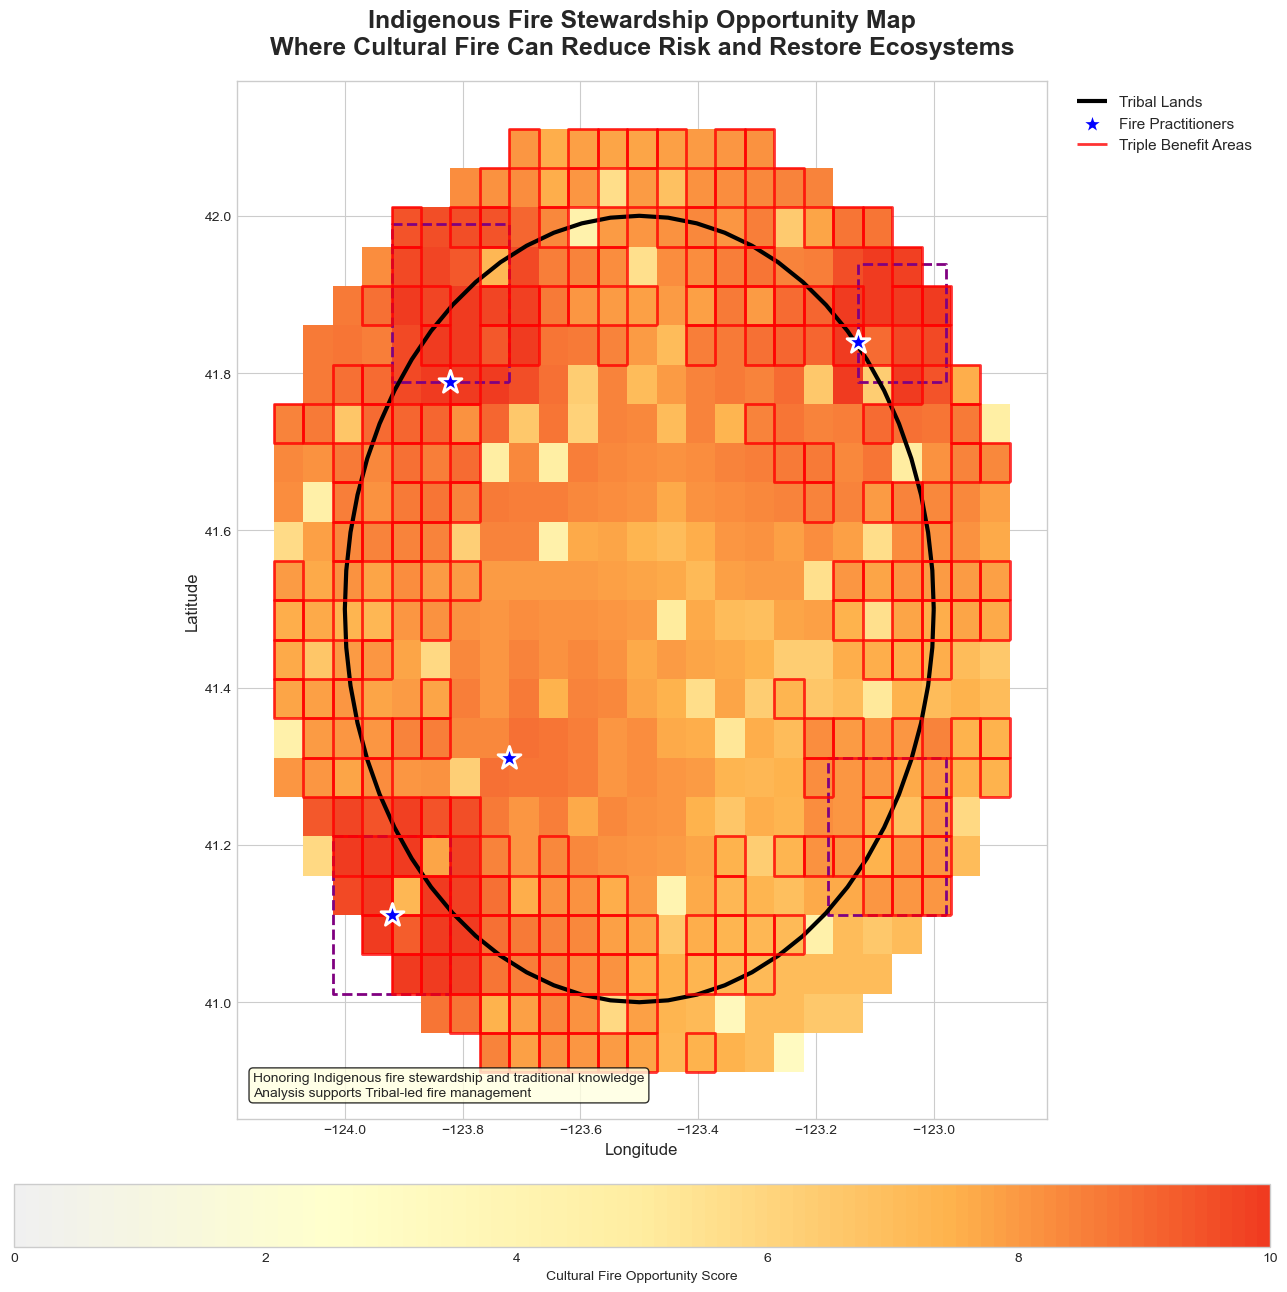


Opportunity map saved to: cultural_fire_opportunity_map.png


In [23]:
# Create opportunity map
fig, ax = plt.subplots(figsize=(16, 14))

# Plot opportunity scores
opportunity_cmap = LinearSegmentedColormap.from_list(
    'opportunity',
    ['#f0f0f0', '#ffffcc', '#ffeda0', '#feb24c', '#f03b20'],
    N=100
)

final_analysis.plot(
    column='opportunity_score',
    cmap=opportunity_cmap,
    vmin=0,
    vmax=10,
    ax=ax,
    edgecolor='none',
    legend=True,
    legend_kwds={
        'label': 'Cultural Fire Opportunity Score',
        'orientation': 'horizontal',
        'shrink': 0.8,
        'pad': 0.05
    }
)

# Plot tribal boundary
tribal_lands.boundary.plot(
    ax=ax,
    color='black',
    linewidth=3,
    label='Tribal Lands'
)

# Plot historical fire use areas
if len(historical_fire_areas) > 0:
    historical_fire_areas.plot(
        ax=ax,
        facecolor='none',
        edgecolor='purple',
        linewidth=2,
        linestyle='--',
        label='Historical Cultural Fire Areas'
    )

# Plot fire practitioners
practitioners.plot(
    ax=ax,
    marker='*',
    color='blue',
    markersize=300,
    edgecolor='white',
    linewidth=2,
    label='Fire Practitioners',
    zorder=5
)

# Highlight triple benefit areas
if len(high_benefit) > 0:
    high_benefit.boundary.plot(
        ax=ax,
        color='red',
        linewidth=2,
        alpha=0.8,
        label='Triple Benefit Areas'
    )

ax.set_title(
    'Indigenous Fire Stewardship Opportunity Map\n'
    'Where Cultural Fire Can Reduce Risk and Restore Ecosystems',
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    framealpha=0.9,
    fontsize=11
)

# Add acknowledgment
ax.text(
    0.02, 0.02,
    'Honoring Indigenous fire stewardship and traditional knowledge\n'
    'Analysis supports Tribal-led fire management',
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='bottom',
    bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8)
)

plt.tight_layout()
plt.savefig('C:\Miniconda\Tribal_fire_science\output/cultural_fire_opportunity_map.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOpportunity map saved to: cultural_fire_opportunity_map.png")

### Co-Benefits Dashboard

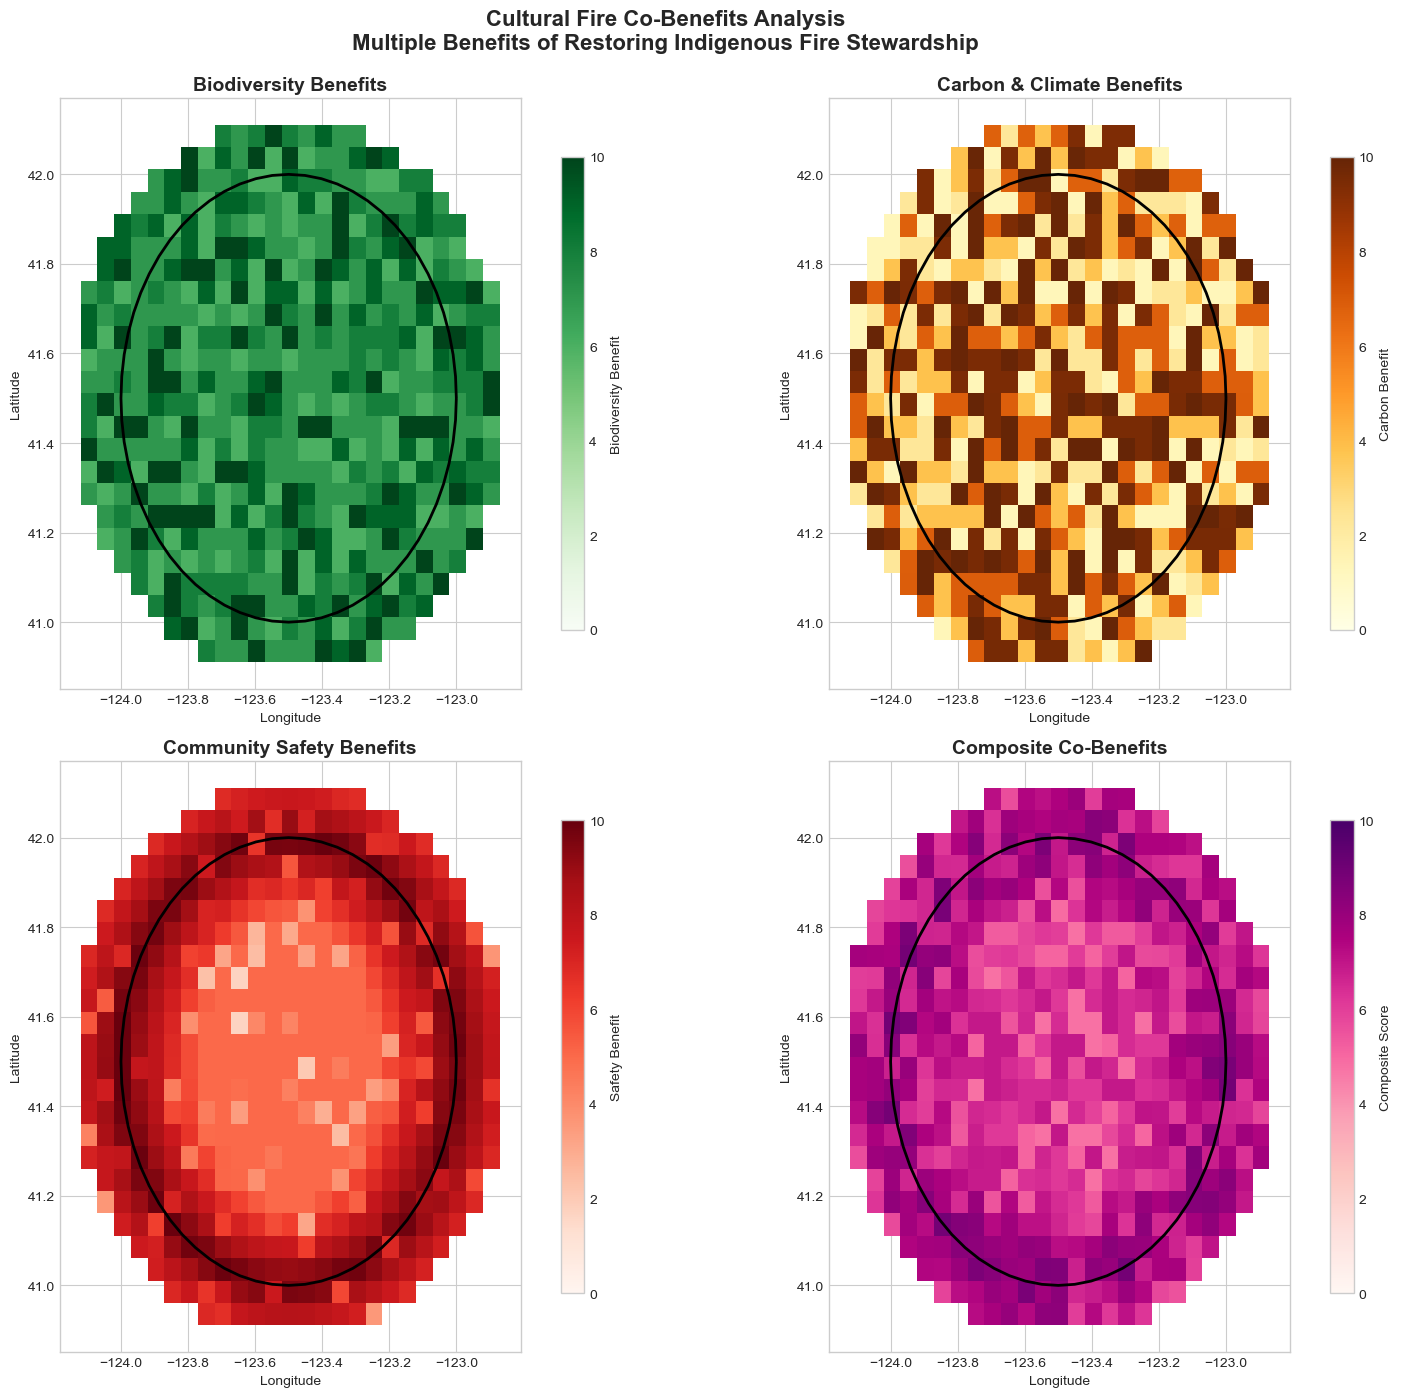


Co-benefits dashboard saved to: co_benefits_dashboard.png


In [24]:
# Create co-benefits dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Biodiversity benefits
final_analysis.plot(
    column='biodiversity_benefit',
    cmap='Greens',
    vmin=0,
    vmax=10,
    ax=axes[0, 0],
    edgecolor='none',
    legend=True,
    legend_kwds={'label': 'Biodiversity Benefit', 'shrink': 0.8}
)
tribal_lands.boundary.plot(ax=axes[0, 0], color='black', linewidth=2)
axes[0, 0].set_title('Biodiversity Benefits', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')

# Carbon benefits
final_analysis.plot(
    column='carbon_benefit_score',
    cmap='YlOrBr',
    vmin=0,
    vmax=10,
    ax=axes[0, 1],
    edgecolor='none',
    legend=True,
    legend_kwds={'label': 'Carbon Benefit', 'shrink': 0.8}
)
tribal_lands.boundary.plot(ax=axes[0, 1], color='black', linewidth=2)
axes[0, 1].set_title('Carbon & Climate Benefits', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')

# Community safety
final_analysis.plot(
    column='community_safety_benefit',
    cmap='Reds',
    vmin=0,
    vmax=10,
    ax=axes[1, 0],
    edgecolor='none',
    legend=True,
    legend_kwds={'label': 'Safety Benefit', 'shrink': 0.8}
)
tribal_lands.boundary.plot(ax=axes[1, 0], color='black', linewidth=2)
axes[1, 0].set_title('Community Safety Benefits', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')

# Composite co-benefits
final_analysis.plot(
    column='co_benefits_score',
    cmap='RdPu',
    vmin=0,
    vmax=10,
    ax=axes[1, 1],
    edgecolor='none',
    legend=True,
    legend_kwds={'label': 'Composite Score', 'shrink': 0.8}
)
tribal_lands.boundary.plot(ax=axes[1, 1], color='black', linewidth=2)
axes[1, 1].set_title('Composite Co-Benefits', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')

plt.suptitle(
    'Cultural Fire Co-Benefits Analysis\n'
    'Multiple Benefits of Restoring Indigenous Fire Stewardship',
    fontsize=16,
    fontweight='bold',
    y=0.995
)

plt.tight_layout()
plt.savefig('C:\Miniconda\Tribal_fire_science\output/co_benefits_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCo-benefits dashboard saved to: co_benefits_dashboard.png")

### Priority Ranking Visualization

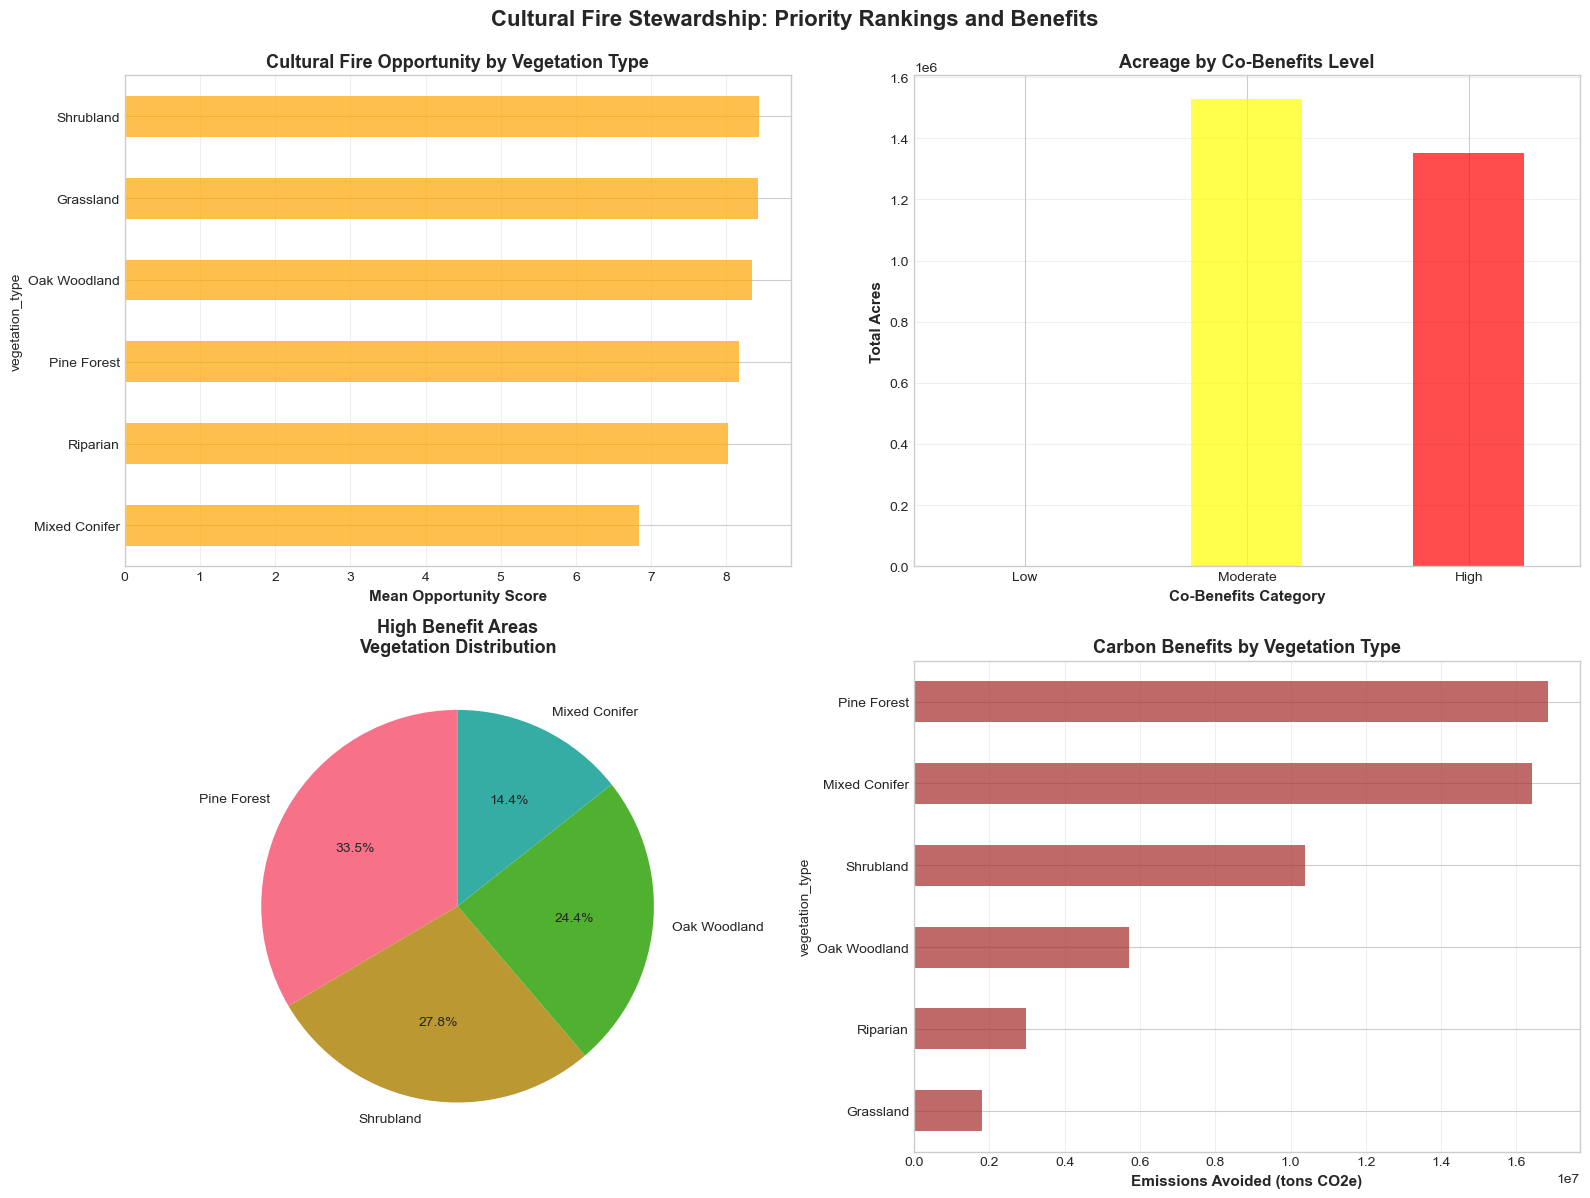


Priority rankings saved to: priority_rankings.png


In [25]:
# Create priority ranking charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Opportunity by vegetation type
veg_opportunity = final_analysis.groupby('vegetation_type').agg({
    'opportunity_score': 'mean',
    'area_acres': 'sum'
}).sort_values('opportunity_score', ascending=True)

veg_opportunity['opportunity_score'].plot(
    kind='barh',
    ax=axes[0, 0],
    color='orange',
    alpha=0.7
)
axes[0, 0].set_xlabel('Mean Opportunity Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Cultural Fire Opportunity by Vegetation Type',
                     fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Co-benefits by category
benefit_summary = final_analysis.groupby('co_benefits_category').agg({
    'area_acres': 'sum',
    'wildfire_emissions_avoided_tons': 'sum'
})

benefit_summary['area_acres'].plot(
    kind='bar',
    ax=axes[0, 1],
    color=['green', 'yellow', 'red'],
    alpha=0.7
)
axes[0, 1].set_xlabel('Co-Benefits Category', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Total Acres', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Acreage by Co-Benefits Level',
                     fontsize=13, fontweight='bold')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# High benefit breakdown
if len(high_benefit) > 0:
    triple_veg = high_benefit['vegetation_type'].value_counts()
    triple_veg.plot(
        kind='pie',
        ax=axes[1, 0],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1, 0].set_title('High Benefit Areas\nVegetation Distribution',
                         fontsize=13, fontweight='bold')
    axes[1, 0].set_ylabel('')
else:
    axes[1, 0].text(0.5, 0.5, 'No High Benefit\nAreas Identified',
                    ha='center', va='center', fontsize=14)
    axes[1, 0].axis('off')

# Carbon emissions avoided
carbon_by_veg = final_analysis.groupby('vegetation_type')[
    'wildfire_emissions_avoided_tons'
].sum().sort_values(ascending=True)

carbon_by_veg.plot(
    kind='barh',
    ax=axes[1, 1],
    color='brown',
    alpha=0.7
)
axes[1, 1].set_xlabel('Emissions Avoided (tons CO2e)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Carbon Benefits by Vegetation Type',
                     fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.suptitle(
    'Cultural Fire Stewardship: Priority Rankings and Benefits',
    fontsize=16,
    fontweight='bold',
    y=0.995
)

plt.tight_layout()
plt.savefig('C:\Miniconda\Tribal_fire_science\output/priority_rankings.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPriority rankings saved to: priority_rankings.png")

## Export Results

In [31]:
# Create output directory
output_dir = r'C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs'
# OR use forward slashes: output_dir = 'C:/Miniconda/Tribal_fire_science/output/cultural_fire_outputs'
os.makedirs(output_dir, exist_ok=True)

# Convert categorical columns to strings
final_analysis_export = final_analysis.copy()
for col in final_analysis_export.select_dtypes(['category']).columns:
    final_analysis_export[col] = final_analysis_export[col].astype(str)

# Export opportunity areas
final_analysis_export.to_file(
    os.path.join(output_dir, 'cultural_fire_opportunity.geojson'),
    driver='GeoJSON'
)
print(f"Exported: {os.path.join(output_dir, 'cultural_fire_opportunity.geojson')}")

# Export high priority areas only
high_priority = final_analysis_export[
    (final_analysis_export['opportunity_category'] == 'High') |
    (final_analysis_export['co_benefits_category'] == 'High')
].copy()

if len(high_priority) > 0:
    high_priority.to_file(
        os.path.join(output_dir, 'high_priority_areas.geojson'),
        driver='GeoJSON'
    )
    print(f"Exported: {os.path.join(output_dir, 'high_priority_areas.geojson')}")
else:
    print("No high priority areas to export")

# Calculate high benefit areas (triple benefit)
high_benefit = final_analysis_export[
    (final_analysis_export['biodiversity_benefit'] > 0.7) &
    (final_analysis_export['carbon_benefit_score'] > 0.7) &
    (final_analysis_export['community_safety_benefit'] > 0.7)
].copy()

# Export summary statistics
summary_stats = {
    'analysis_date': datetime.now().isoformat(),
    'tribe': sample_reservation.get('tribe', 'Unknown') if 'sample_reservation' in locals() else 'Unknown',
    'total_area_analyzed_acres': float(final_analysis_export['area_acres'].sum()),
    'high_opportunity_acres': float(
        final_analysis_export[final_analysis_export['opportunity_category'] == 'High']['area_acres'].sum()
    ),
    'triple_benefit_acres': float(high_benefit['area_acres'].sum()) if len(high_benefit) > 0 else 0,
    'total_emissions_avoided_tons': float(final_analysis_export['wildfire_emissions_avoided_tons'].sum()),
    'practitioners_available': len(practitioners) if 'practitioners' in locals() else 0,
    'culturally_trained_crews': int(practitioners['trained_in_cultural_burning'].sum()) if 'practitioners' in locals() else 0,
    'historical_use_areas': len(historical_fire_areas) if 'historical_fire_areas' in locals() else 0
}

with open(os.path.join(output_dir, 'summary_statistics.json'), 'w') as f:
    json.dump(summary_stats, f, indent=2)
print(f"Exported: {os.path.join(output_dir, 'summary_statistics.json')}")

# Export detailed data table
export_cols = [
    'vegetation_type', 'opportunity_score', 'opportunity_category',
    'ecological_suitability', 'fire_risk_score', 'accessibility_score',
    'biodiversity_benefit', 'carbon_benefit_score', 'community_safety_benefit',
    'co_benefits_score', 'co_benefits_category',
    'area_acres', 'wildfire_emissions_avoided_tons',
    'historical_use', 'culturally_trained_available'
]

# Only export columns that exist
export_cols_available = [col for col in export_cols if col in final_analysis_export.columns]

final_analysis_export[export_cols_available].to_csv(
    os.path.join(output_dir, 'detailed_analysis.csv'),
    index=False
)
print(f"Exported: {os.path.join(output_dir, 'detailed_analysis.csv')}")

print("\n" + "="*80)
print("OUTPUTS EXPORTED SUCCESSFULLY")
print("="*80)
print(f"\nLocation: {output_dir}")
print(f"Files created:")
print(f"  - cultural_fire_opportunity.geojson ({len(final_analysis_export)} features)")
print(f"  - high_priority_areas.geojson ({len(high_priority)} features)")
print(f"  - summary_statistics.json")
print(f"  - detailed_analysis.csv")

Exported: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs\cultural_fire_opportunity.geojson
Exported: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs\high_priority_areas.geojson
Exported: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs\summary_statistics.json
Exported: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs\detailed_analysis.csv

OUTPUTS EXPORTED SUCCESSFULLY

Location: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs
Files created:
  - cultural_fire_opportunity.geojson (503 features)
  - high_priority_areas.geojson (467 features)
  - summary_statistics.json
  - detailed_analysis.csv


## Generate Report

In [32]:
# Create report
report = f"""
{'='*80}
INDIGENOUS FIRE STEWARDSHIP OPPORTUNITY ANALYSIS
{'='*80}
Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}
Tribe: {sample_reservation['tribe']}
Traditional Territory: {sample_reservation['reservation_name']}

ACKNOWLEDGING INDIGENOUS FIRE STEWARDSHIP
{'='*80}

This analysis recognizes that:

• Indigenous peoples have been sophisticated fire stewards for millennia
• Traditional fire practices created and maintained diverse, resilient ecosystems
• Colonial fire suppression disrupted these practices and harmed landscapes
• Restoring cultural burning is essential for ecological and cultural health
• Tribal sovereignty and traditional knowledge must guide fire management
• Western science should support, not replace, Indigenous knowledge

Fire Tradition: {sample_reservation['fire_tradition']}
Current Program: {sample_reservation['current_fire_program']}

EXECUTIVE SUMMARY
{'='*80}

This analysis identifies opportunities to restore Indigenous fire stewardship
practices that can simultaneously:
  • Reduce catastrophic wildfire risk
  • Restore cultural relationships with fire and land
  • Enhance biodiversity and ecosystem function
  • Sequester carbon and reduce emissions
  • Protect community safety

FINDINGS:

Total Area Analyzed: {final_analysis['area_acres'].sum():,.0f} acres

HIGH OPPORTUNITY AREAS:
  Acres: {final_analysis[final_analysis['opportunity_category'] == 'High']['area_acres'].sum():,.0f}
  Percentage: {len(final_analysis[final_analysis['opportunity_category'] == 'High'])/len(final_analysis)*100:.1f}%

TRIPLE BENEFIT AREAS (High Opportunity/High Co-Benefits):
  Count: {len(high_benefit)}
  Acres: {high_benefit['area_acres'].sum():,.0f}
  Percentage: {len(high_benefit)/len(final_analysis)*100:.1f}%

PRACTITIONER CAPACITY:
  Total Crews/Programs: {len(practitioners)}
  Culturally Trained: {practitioners['trained_in_cultural_burning'].sum()}
  Traditional Knowledge Holders: {practitioners['traditional_knowledge'].sum()}
  Total Crew Members: {practitioners['crew_size'].sum()}
  Burn Boss Qualified: {practitioners['burn_boss_qualified'].sum()}

HISTORICAL CULTURAL FIRE USE:
  Documented Areas: {len(historical_fire_areas)}
  Knowledge Sources: Tribal elders, historical records, fire scar studies

CO-BENEFITS ANALYSIS
{'='*80}

BIODIVERSITY BENEFITS:
  Areas with high biodiversity benefit: {len(final_analysis[final_analysis['biodiversity_benefit'] >= 8])}
  Native plant enhancement opportunities: {final_analysis['native_plant_enhancement'].sum()}
  Pollinator habitat improvement: {final_analysis['pollinator_benefit'].sum()}
  Wildlife habitat enhancement: {final_analysis['wildlife_habitat_improvement'].sum()}

CARBON and CLIMATE BENEFITS:
  Total fuel reduction potential: {final_analysis['total_fuel_reduction_tons'].sum():,.0f} tons
  Wildfire emissions avoided: {final_analysis['wildfire_emissions_avoided_tons'].sum():,.0f} tons CO2e
  Carbon sequestration capacity enhanced: High (maintained large tree carbon stocks)

COMMUNITY SAFETY BENEFITS:
  High-priority safety zones: {final_analysis['safety_priority'].sum()}
  Areas within 5km of community: {len(final_analysis[final_analysis['distance_to_community_km'] <= 5])}
  High-risk fuel reduction: Significant reduction in catastrophic fire potential

OPPORTUNITY BREAKDOWN BY VEGETATION TYPE
{'='*80}
"""

for veg_type in final_analysis['vegetation_type'].unique():
    veg_data = final_analysis[final_analysis['vegetation_type'] == veg_type]
    high_opp = veg_data[veg_data['opportunity_category'] == 'High']
    
    report += f"""
{veg_type}:
  Total acres: {veg_data['area_acres'].sum():,.0f}
  High opportunity acres: {high_opp['area_acres'].sum():,.0f}
  Mean opportunity score: {veg_data['opportunity_score'].mean():.2f}
  Historical fire return interval: {veg_data['historical_fire_return_interval_years'].mean():.0f} years
  Recommended burn interval: {veg_data['recommended_interval'].mode()[0] if len(veg_data) > 0 else 'Variable'}
  Biodiversity benefit: {veg_data['biodiversity_benefit'].mean():.1f}/10
  Carbon benefit: {veg_data['wildfire_emissions_avoided_tons'].sum():,.0f} tons CO2e avoided
"""

report += f"""

PRIORITY RECOMMENDATIONS
{'='*80}

IMMEDIATE PRIORITIES:

RESTORE HISTORICAL CULTURAL BURNING AREAS
   - Focus on documented traditional use areas
   - Engage Tribal elders in planning and implementation
   - Acres: {final_analysis[final_analysis['historical_use']]['area_acres'].sum():,.0f}
   - Priority vegetation: Oak Woodland, Grassland

ADDRESS HIGH-RISK COMMUNITY INTERFACE ZONES
   - Protect communities from catastrophic fire
   - Strategic fuel reduction near housing
   - Acres: {final_analysis[final_analysis['safety_priority']]['area_acres'].sum():,.0f}

EXPAND PRACTITIONER CAPACITY
   - Train additional cultural burning practitioners
   - Support intergenerational knowledge transfer
   - Enhance burn boss qualifications
   - Current capacity: {practitioners['crew_size'].sum()} crew members
   - Target expansion: +50% within 2 years

MEDIUM-TERM PRIORITIES:

SCALE TO TRIPLE BENEFIT AREAS
   - Maximize ecological, carbon, and safety benefits
   - Target acres: {high_benefit['area_acres'].sum():,.0f}
   - Build on initial successes and lessons learned

ESTABLISH CULTURAL FIRE MANAGEMENT AUTHORITY
   - Formalize Tribal jurisdiction over fire management
   - Develop cooperative agreements with federal/state agencies
   - Create dedicated funding streams
   - Implement traditional knowledge protocols

MONITOR AND ADAPT
   - Document ecological responses
   - Track cultural and social benefits
   - Adjust practices based on outcomes
   - Share knowledge with other tribes

BARRIERS TO ADDRESS:

• Regulatory constraints on Tribal burning authority
• Limited funding for Tribal fire programs
• Air quality permit requirements
• Liability concerns
• Loss of traditional knowledge due to suppression era
• Lack of federal agency support/understanding
• Climate change impacts on burn windows

LEVERAGE:

• Strong cultural fire tradition and knowledge
• Active Tribal fire program
• Growing recognition of Indigenous fire stewardship
• Climate change urgency creating policy openings
• Emerging funding sources (IRA, BIL, carbon markets)
• Regional cultural burning networks (IPBN, etc.)
• Scientific validation of cultural fire benefits

DATA SOURCES & METHODS
{'='*80}

This analysis integrated:
• Tribal traditional knowledge and oral histories
• Vegetation and ecosystem data (LANDFIRE, state maps)
• Fire history data (fire scars, dendrochronology)
• Fire risk assessments
• Practitioner capacity inventories
• Carbon and biodiversity science

Western scientific methods were used to support traditional knowledge,
not to replace it. Indigenous peoples are the authorities on their own fire practices and landscapes.

OUTPUT FILES
{'='*80}

Spatial Data:
  - cultural_fire_opportunity.geojson (all analyzed areas)
  - high_priority_areas.geojson (top priorities only)

Data Tables:
  - detailed_analysis.csv (full dataset)
  - summary_statistics.json (key metrics)

Maps & Figures:
  - cultural_fire_opportunity_map.png
  - co_benefits_dashboard.png
  - priority_rankings.png

CONCLUSION
{'='*80}

Restoring Indigenous fire stewardship offers a path forward that honors
traditional knowledge, supports tribal sovereignty, and creates multiple
benefits for ecosystems, climate, and communities.

This analysis shows where cultural fire can be most effective. But how
it is implemented must be guided by Tribal knowledge holders, cultural
protocols, and community values.

Cultural and traditional fire practices rests with
Indigenous peoples who have always been the fire stewards.

{'='*80}
For Tribal Use - Supports Tribal Fire Management Planning
{'='*80}
"""

# Save report
report_path = f'{output_dir}/Cultural_Fire_Stewardship_Report.txt'
with open(report_path, 'w') as f:
    f.write(report)

print(f"\nReport saved to: {report_path}")
print("\n" + report)


Report saved to: C:\Miniconda\Tribal_fire_science\output\cultural_fire_outputs/Cultural_Fire_Stewardship_Report.txt


INDIGENOUS FIRE STEWARDSHIP OPPORTUNITY ANALYSIS
Report Generated: 2026-02-16 16:32
Tribe: Karuk Tribe
Traditional Territory: Karuk Ancestral Territory

ACKNOWLEDGING INDIGENOUS FIRE STEWARDSHIP

This analysis recognizes that:

• Indigenous peoples have been sophisticated fire stewards for millennia
• Traditional fire practices created and maintained diverse, resilient ecosystems
• Colonial fire suppression disrupted these practices and harmed landscapes
• Restoring cultural burning is essential for ecological and cultural health
• Tribal sovereignty and traditional knowledge must guide fire management
• Western science should support, not replace, Indigenous knowledge

Fire Tradition: Active fire stewardship for millennia
Current Program: Yes: Cultural burning program established

EXECUTIVE SUMMARY

This analysis identifies opportunities to restore Indigenous fire ste

## Data Sources and Implementation Guidance

### Real-World Data Sources:

**Traditional Knowledge:**
- Tribal Elders and cultural practitioners
- Oral histories
- Tribal archives
- Cultural resource departments

**Vegetation & Ecosystems:**
- LANDFIRE Existing Vegetation Type (EVT)
- LANDFIRE Biophysical Settings (BpS) - historical conditions
- State vegetation maps
- Tribal ecological assessments

**Fire History:**
- Fire scar studies (dendrochronology)
- Historical accounts and journals
- Archaeological evidence
- Tribal fire calendars

**Practitioners:**
- Indigenous Peoples Burning Network (IPBN)
- Tribal fire departments
- Cultural burning associations
- Fire training programs

### Implementation Guidance:

**Center Indigenous Knowledge**
   - Start with Tribal knowledge holders
   - Use science to support, not validate
   - Respect cultural protocols
   - Ensure Tribal data sovereignty

**Build Capacity**
   - Train new practitioners
   - Support intergenerational learning
   - Develop burn boss qualifications
   - Create apprenticeship programs

**Start Small, Learn, Scale**
   - Begin with high-confidence areas
   - Document and adapt
   - Share lessons learned
   - Expand based on success

**Address Barriers Systematically**
   - Negotiate regulatory flexibility
   - Secure dedicated funding
   - Build agency partnerships
   - Establish tribal authority

**Monitor Multiple Values**
   - Ecological outcomes
   - Cultural continuity
   - Community safety
   - Carbon benefits
   - Social cohesion

### Resources:

- **Indigenous Peoples Burning Network**: www.indigenouspeoplesburningnetwork.org
- **Karuk Tribe**: Cultural fire program example
- **North Fork Mono Tribe**: Cultural burning revival
- **TREX**: Prescribed Fire Training Exchanges
- **FAC Net**: Fire Adapted Communities Network